# **Dataset 3**

### **Import Packages**

In [1]:
import multiprocessing
import subprocess
import pandas as pd
from sklearn.model_selection import train_test_split

from Data_Generation.data_synthesizer import ds_generate_data
from Data_Generation.synthetic_data_vault import sdv_generate_data
from Data_Evaluation.utility import run_utility_eval
from Data_Evaluation.resemblance import pairwise_correlation_diff, jsd, wd
from Data_Evaluation.privacy import dcr, nndr, mia
from sklearn.preprocessing import LabelEncoder

### **Exploratory Data Analysis**

In [2]:
# Load the dataset as dataframe
data_path = "Original_Data/Dataset_3/Dataset_3.csv"
original_data = pd.read_csv(data_path)
original_data.head()

,Gender,Age,POLAR4 Quintile,POLAR3 Quintile,Adult HE 2001 Quintile,Adult HE 2011 Quintile,TUNDRA MSOA Quintile,TUNDRA LSOA Quintile,Gaps GCSE Quintile,Gaps GCSE Ethnicity Quintile,...,distance to university (km),Count of Module Area Logins,Total Hours in Module Area,% of Average Hours in Module Area,# of presence,# of Absence,Percent Attended,"label (fail=1, pass=0)",Unnamed: 20,Unnamed: 21
0,0.0,38.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,...,13.333806,19.0,7.41,0.620767,3.0,9.0,25.000000,1.0,NaN,NaN
1,0.0,22.0,4.0,2.0,1.0,3.0,4.0,4.0,4.0,5.0,...,15.844126,1.0,0.03,0.002513,0.0,12.0,0.000000,1.0,NaN,NaN
2,0.0,21.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,...,17.706573,25.0,6.14,0.514374,5.0,7.0,41.666667,1.0,NaN,NaN
3,0.0,25.0,5.0,4.0,3.0,4.0,3.0,3.0,5.0,5.0,...,17.327498,3.0,0.16,0.013404,0.0,12.0,0.000000,1.0,NaN,NaN
4,0.0,20.0,5.0,4.0,3.0,4.0,3.0,3.0,4.0,4.0,...,0.000000,25.0,4.03,0.337610,11.0,1.0,91.666667,1.0,NaN,NaN


In [3]:
# Get general information about the dataset
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             80 non-null     float64
 1   Age                                80 non-null     float64
 2   POLAR4 Quintile                    80 non-null     float64
 3   POLAR3 Quintile                    80 non-null     float64
 4   Adult HE 2001 Quintile             80 non-null     float64
 5   Adult HE 2011 Quintile             80 non-null     float64
 6   TUNDRA MSOA Quintile               80 non-null     float64
 7   TUNDRA LSOA Quintile               80 non-null     float64
 8   Gaps GCSE Quintile                 80 non-null     float64
 9   Gaps GCSE Ethnicity Quintile       80 non-null     float64
 10  Uni Connect target ward            80 non-null     float64
 11  attending from home?               80 non-null     float64
 

In [4]:
# Check for missing values
original_data.isnull().sum()

Gender                                7
Age                                   7
POLAR4 Quintile                       7
POLAR3 Quintile                       7
Adult HE 2001 Quintile                7
Adult HE 2011 Quintile                7
TUNDRA MSOA Quintile                  7
TUNDRA LSOA Quintile                  7
Gaps GCSE Quintile                    7
Gaps GCSE Ethnicity Quintile          7
Uni Connect target ward               7
attending from home?                  7
distance to university (km)           7
Count of Module Area Logins           7
Total Hours in Module Area            7
% of Average Hours in Module Area     7
# of presence                         7
# of Absence                          9
Percent Attended                      7
label (fail=1, pass=0)                7
Unnamed: 20                          87
Unnamed: 21                          87
dtype: int64

In [5]:
original_data.tail(10)

,Gender,Age,POLAR4 Quintile,POLAR3 Quintile,Adult HE 2001 Quintile,Adult HE 2011 Quintile,TUNDRA MSOA Quintile,TUNDRA LSOA Quintile,Gaps GCSE Quintile,Gaps GCSE Ethnicity Quintile,...,distance to university (km),Count of Module Area Logins,Total Hours in Module Area,% of Average Hours in Module Area,# of presence,# of Absence,Percent Attended,"label (fail=1, pass=0)",Unnamed: 20,Unnamed: 21
77,0.0,22.0,3.0,4.0,3.0,4.0,3.0,3.0,5.0,5.0,...,10.235646,32.0,5.68,0.475838,11.0,1.0,91.666667,0.0,NaN,NaN
78,1.0,21.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,5.0,...,56.938766,35.0,15.59,1.306041,8.0,4.0,66.666667,0.0,NaN,NaN
79,1.0,20.0,5.0,5.0,4.0,4.0,3.0,3.0,5.0,5.0,...,20.031985,23.0,16.30,1.365520,5.0,7.0,41.666667,0.0,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Findings: 
- 2 columns without any values
- last 7 rows without any values
- 2 additional missing values in column '# of Absence'

Thus:
- remove empty rows and columns and fill remaining missing values

In [6]:
# Drop empty columns
original_data.drop(['Unnamed: 20'], axis=1, inplace=True)
original_data.drop(['Unnamed: 21'], axis=1, inplace=True)

# Drop last 7 rows
original_data.drop(original_data.tail(7).index, inplace=True)
original_data.tail(10)

# Fill missing values with the mode of the column
original_data = original_data.fillna(original_data.mode().iloc[0])


In [7]:
# Check again for missing values
original_data.isnull().sum()

Gender                               0
Age                                  0
POLAR4 Quintile                      0
POLAR3 Quintile                      0
Adult HE 2001 Quintile               0
Adult HE 2011 Quintile               0
TUNDRA MSOA Quintile                 0
TUNDRA LSOA Quintile                 0
Gaps GCSE Quintile                   0
Gaps GCSE Ethnicity Quintile         0
Uni Connect target ward              0
attending from home?                 0
distance to university (km)          0
Count of Module Area Logins          0
Total Hours in Module Area           0
% of Average Hours in Module Area    0
# of presence                        0
# of Absence                         0
Percent Attended                     0
label (fail=1, pass=0)               0
dtype: int64

In [8]:
# Check number of unique values in each column
original_data.nunique()

Gender                                2
Age                                  12
POLAR4 Quintile                       5
POLAR3 Quintile                       5
Adult HE 2001 Quintile                5
Adult HE 2011 Quintile                6
TUNDRA MSOA Quintile                  6
TUNDRA LSOA Quintile                  6
Gaps GCSE Quintile                    6
Gaps GCSE Ethnicity Quintile          6
Uni Connect target ward               2
attending from home?                  2
distance to university (km)          46
Count of Module Area Logins          49
Total Hours in Module Area           78
% of Average Hours in Module Area    78
# of presence                        12
# of Absence                         11
Percent Attended                     14
label (fail=1, pass=0)                2
dtype: int64

In [9]:
# Check categorical columns
categorical_cols = original_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(col, original_data[col].unique())

### **Synthetic Data Generation**

In [10]:
# Set the start method of the multiprocessing module to 'fork' to avoid an error
multiprocessing.set_start_method('fork', force=True)

# Number of samples to generate
n = 5000

train_data, test_data = train_test_split(original_data, test_size=0.3, random_state=42)
train_data.to_csv("Original_Data/Dataset_3/train_data.csv", index=False)
test_data.to_csv("Original_Data/Dataset_3/test_data.csv", index=False)

In [11]:
# !!Only if the synthetic data is not already generated!!

# Use train_data.csv to fit SDG models and generate synthetic data

# data_path = "Original_Data/train_data.csv"
# arguments = [data_path, str(n), "3"]

# print("Sampling synthpop...")
# result = subprocess.run(['Rscript', 'Data_Generation/synthpop.R',   *arguments], capture_output=True, text=True)

# print("Sampling DataSynthesizer...")
# ds_generate_data(data_path=data_path, num_samples=n, dataset_nr="3")

# sdv_generate_data(data_path=data_path, num_samples=n, dataset_nr="3")

Encode all categorical columns of both original (train+test) data and synthetic data using label encoding

In [12]:
synthpop = pd.read_csv("Synthetic_Data/Dataset_3/synthpop_samples.csv")
ds = pd.read_csv("Synthetic_Data/Dataset_3/ds_samples.csv")
tvae = pd.read_csv("Synthetic_Data/Dataset_3/tvae_samples.csv")
gaussian_copula = pd.read_csv("Synthetic_Data/Dataset_3/gaussian_samples.csv")
copula_gan = pd.read_csv("Synthetic_Data/Dataset_3/copula_gan_samples.csv")
ctgan = pd.read_csv("Synthetic_Data/Dataset_3/ctgan_samples.csv")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.fit_transform(test_data[col])

    synthpop[col] = le.fit_transform(synthpop[col])
    ds[col] = le.fit_transform(ds[col])
    tvae[col] = le.fit_transform(tvae[col])
    gaussian_copula[col] = le.fit_transform(gaussian_copula[col])
    copula_gan[col] = le.fit_transform(copula_gan[col])
    ctgan[col] = le.fit_transform(ctgan[col])

    label_encoders[col] = le

### **Utility Evaluation**

Prepare utility evaluation

In [13]:
# Prepare datasets for utility evalutation
models = [synthpop, ds, tvae, gaussian_copula, copula_gan, ctgan]
model_names = ["synthpop", "ds", "tvae", "gaussian_copula", "copula_gan", "ctgan"]
target_col = "label (fail=1, pass=0)"

Run random forest classifier for utility evaluation

In [14]:
rf_results = {}
rf_df = pd.read_csv("Evaluation_Results/RF_Results.csv")
rows = []
for i, model in enumerate(models):
    rf_results[model_names[i]] = run_utility_eval(train_data, test_data, model, target_col, "random_forest")
    acc_diff = rf_results[model_names[i]]["acc_diff"]
    f1_diff = rf_results[model_names[i]]["f1_diff"]
    roc_auc_diff = rf_results[model_names[i]]["roc_auc_diff"]
    rows.append([3, model_names[i], acc_diff, f1_diff, roc_auc_diff])
    
rows = pd.DataFrame(rows, columns=rf_df.columns)
rf_df = pd.concat([rf_df, rows], ignore_index=True)
rf_df.to_csv("Evaluation_Results/RF_Results.csv", index=False)
rf_df.head(20)

,Dataset,Model,Accuracy Difference,F1 Score Difference,ROC AUC Difference
0,1,synthpop,0.07,0.07,0.05
1,1,ds,0.46,0.47,0.49
2,1,tvae,0.19,0.24,0.10
3,1,gaussian_copula,0.37,0.42,0.40
4,1,copula_gan,0.42,0.44,0.40
5,1,ctgan,0.50,0.55,0.43
6,2,synthpop,-0.04,0.01,-0.05
7,2,ds,0.04,0.05,0.04
8,2,tvae,-0.03,-0.02,-0.03
9,2,gaussian_copula,-0.06,0.01,-0.04


Run logistic regression for utility evaluation

In [15]:
lr_results = {}
lr_df = pd.read_csv("Evaluation_Results/LR_Results.csv")
rows = []

for i, model in enumerate(models):
    lr_results[model_names[i]] = run_utility_eval(train_data, test_data, model, target_col, "logistic_regression")

    acc_diff = lr_results[model_names[i]]["acc_diff"]
    f1_diff = lr_results[model_names[i]]["f1_diff"]
    roc_auc_diff = lr_results[model_names[i]]["roc_auc_diff"]

    rows.append([3, model_names[i], acc_diff, f1_diff, roc_auc_diff])

rows = pd.DataFrame(rows, columns=lr_df.columns)
lr_df = pd.concat([lr_df, rows])
lr_df.to_csv("Evaluation_Results/LR_Results.csv", index=False)
lr_df.tail(7)

,Dataset,Model,Accuracy Difference,F1 Score Difference,ROC AUC Difference
17,3,ctgan,-0.08,0.00,-0.17
0,3,synthpop,-0.08,-0.08,-0.05
1,3,ds,0.29,0.26,0.06
2,3,tvae,-0.17,-0.15,-0.17
3,3,gaussian_copula,-0.08,0.00,0.02
4,3,copula_gan,-0.08,0.00,0.10
5,3,ctgan,-0.08,0.00,-0.17


Run multilayer perceptron (MLP)

In [16]:
mlp_results = {}
mlp_df = pd.read_csv("Evaluation_Results/MLP_Results.csv")
rows = []

for i, model in enumerate(models):
    mlp_results[model_names[i]] = run_utility_eval(train_data, test_data, model, target_col, "multilayer_perceptron")

    acc_diff = mlp_results[model_names[i]]["acc_diff"]
    f1_diff = mlp_results[model_names[i]]["f1_diff"]
    roc_auc_diff = mlp_results[model_names[i]]["roc_auc_diff"]

    rows.append([3, model_names[i], acc_diff, f1_diff, roc_auc_diff])

rows = pd.DataFrame(rows, columns=mlp_df.columns)
mlp_df = pd.concat([mlp_df, rows])
mlp_df.to_csv("Evaluation_Results/MLP_Results.csv", index=False)
mlp_df.tail(7)

,Dataset,Model,Accuracy Difference,F1 Score Difference,ROC AUC Difference
17,3,ctgan,0.00,0.00,-0.11
0,3,synthpop,0.00,-0.08,-0.20
1,3,ds,0.37,0.24,-0.11
2,3,tvae,-0.04,-0.09,-0.11
3,3,gaussian_copula,0.00,-0.05,-0.17
4,3,copula_gan,0.00,0.00,-0.14
5,3,ctgan,0.00,0.00,-0.11


### **Resemblance**

Run multiple resemblance metrics: Difference in pairwise correlation, Jensen-Shannon divergence, Wasserstein distance

- Correlation distance diff : lower values are better
- JSD in [0,1] range: lower values are better
- WD: lower values are better


**Difference in pairwise correlation:**

In [17]:
corr_diff_df = pd.read_csv("Evaluation_Results/corr_diff.csv")
corr_diff_results = {}
rows = []

for i, model in enumerate(models):
    corr_diff_results[model_names[i]] = pairwise_correlation_diff(train_data, model)
    rows.append([3,model_names[i], corr_diff_results[model_names[i]]])

rows = pd.DataFrame(rows, columns=corr_diff_df.columns)
corr_diff_df = pd.concat([corr_diff_df, rows])
corr_diff_df.to_csv("Evaluation_Results/corr_diff.csv", index=False)
corr_diff_df.tail(7)

,Dataset,Model,Pairwise Corr Diff
17,3,ctgan,0.239476
0,3,synthpop,0.093557
1,3,ds,0.252147
2,3,tvae,0.114105
3,3,gaussian_copula,0.189699
4,3,copula_gan,0.236851
5,3,ctgan,0.239476


**Jensen-Shannon Divergence**

In [18]:
jsd_df = pd.read_csv("Evaluation_Results/jsd.csv")
jsd_results = {}
rows = []

for i, model in enumerate(models):
    jsd_results[model_names[i]] = jsd(train_data, model)
    rows.append([3,model_names[i], jsd_results[model_names[i]]])

rows = pd.DataFrame(rows, columns=jsd_df.columns)
jsd_df = pd.concat([jsd_df, rows])
jsd_df.to_csv("Evaluation_Results/jsd.csv", index=False)
jsd_df.tail(7)

,Dataset,Model,JSD Diff
17,3,ctgan,0.143693
0,3,synthpop,0.000760
1,3,ds,0.195878
2,3,tvae,0.167955
3,3,gaussian_copula,0.170053
4,3,copula_gan,0.167367
5,3,ctgan,0.143693


**Wasserstein Distance**

In [19]:
wd_df = pd.read_csv("Evaluation_Results/wd.csv")
wd_results = {}
rows = []

for i, model in enumerate(models):
    wd_results[model_names[i]] = wd(train_data, model)
    rows.append([3,model_names[i], wd_results[model_names[i]]])

rows = pd.DataFrame(rows, columns=wd_df.columns)
wd_df = pd.concat([wd_df, rows])
wd_df.to_csv("Evaluation_Results/wd.csv", index=False)
wd_df.tail(7)

,Dataset,Model,WD Diff
17,3,ctgan,0.029097
0,3,synthpop,0.007518
1,3,ds,0.095756
2,3,tvae,0.066963
3,3,gaussian_copula,0.023785
4,3,copula_gan,0.031063
5,3,ctgan,0.029097


### **Privacy**

**Distance to closest record (DCR)**

In [20]:
dcr_df = pd.read_csv("Evaluation_Results/dcr.csv")
dcr_results = {}
rows = []

for i, model in enumerate(models):
    dcr_results[model_names[i]] = dcr(train_data, model, model_names[i], dataset_nr=3, save_hist=True)
    rows.append([3,model_names[i], dcr_results[model_names[i]]])

rows = pd.DataFrame(rows, columns=dcr_df.columns)
dcr_df = pd.concat([dcr_df, rows])
dcr_df.to_csv("Evaluation_Results/dcr.csv", index=False)
dcr_df.tail(7)
    

,Dataset,Model,Avg DCR
11,2,ctgan,0.418870
0,3,synthpop,0.250695
1,3,ds,0.394919
2,3,tvae,0.207617
3,3,gaussian_copula,0.250368
4,3,copula_gan,0.272687
5,3,ctgan,0.259526


<Figure size 640x480 with 0 Axes>

**Nearest Neighbor distance ratio (NNDR)**

In [21]:
nndr_df = pd.read_csv("Evaluation_Results/nndr.csv")
nndr_results = {}
rows = []

for i, model in enumerate(models):
    nndr_results[model_names[i]] = nndr(train_data, model)
    rows.append([3,model_names[i], nndr_results[model_names[i]]])

rows = pd.DataFrame(rows, columns=nndr_df.columns)
nndr_df = pd.concat([nndr_df, rows])
nndr_df.to_csv("Evaluation_Results/nndr.csv", index=False)
nndr_df.tail(7) 

,Dataset,Model,Avg NNDR
11,2,ctgan,0.327565
0,3,synthpop,0.791782
1,3,ds,0.938462
2,3,tvae,0.793084
3,3,gaussian_copula,0.892417
4,3,copula_gan,0.925867
5,3,ctgan,0.920543


**Membership Inference Attack (MIA)**

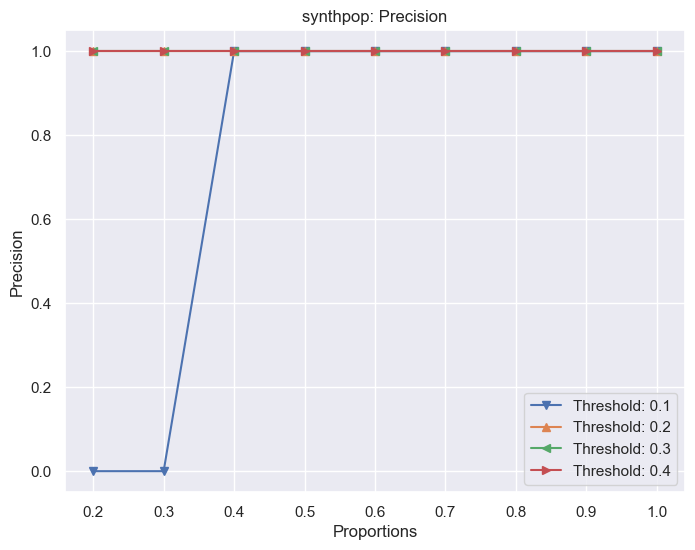

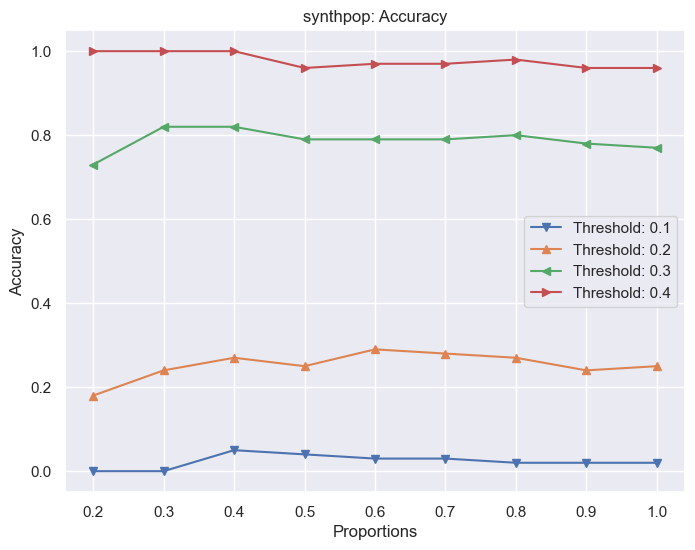

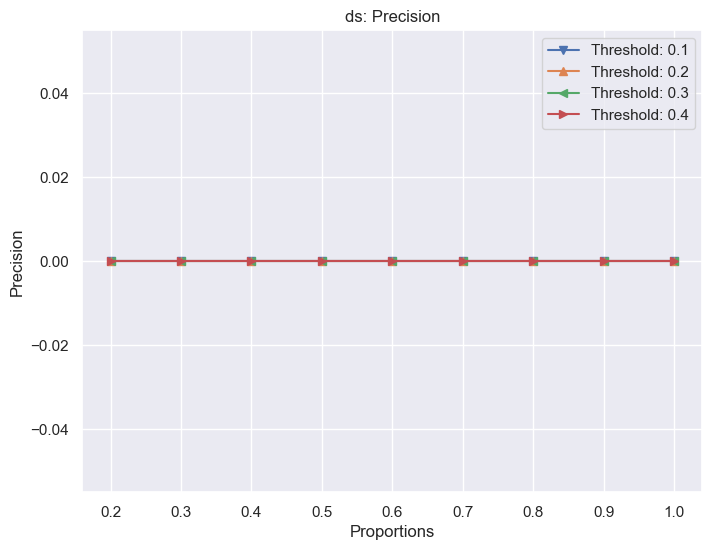

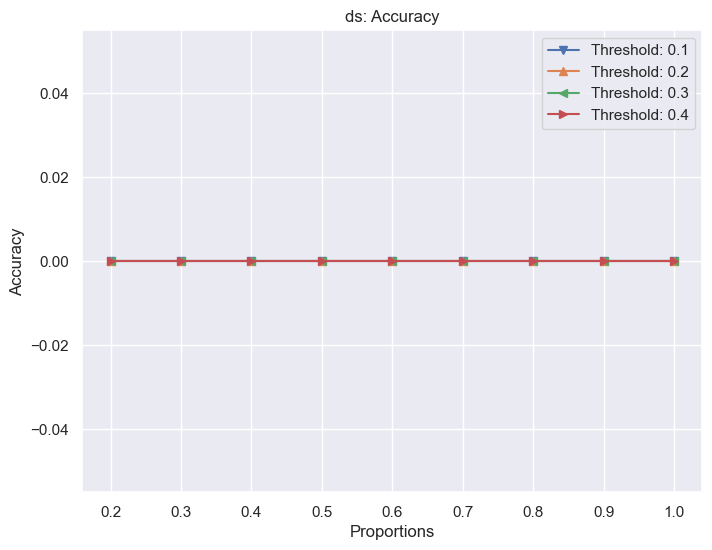

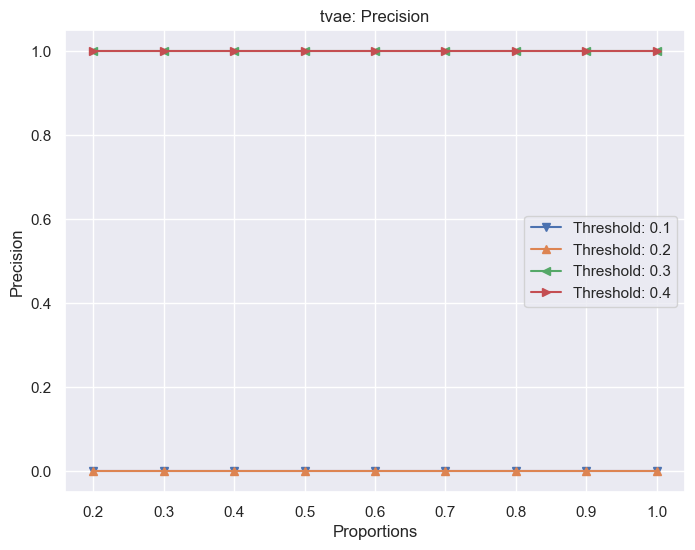

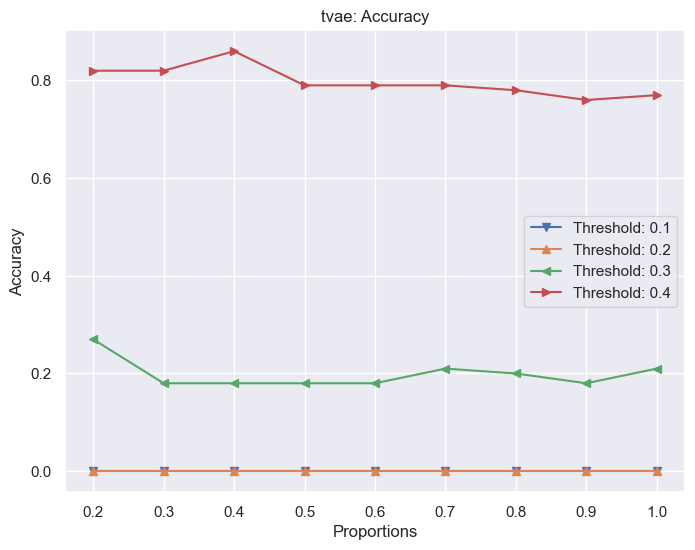

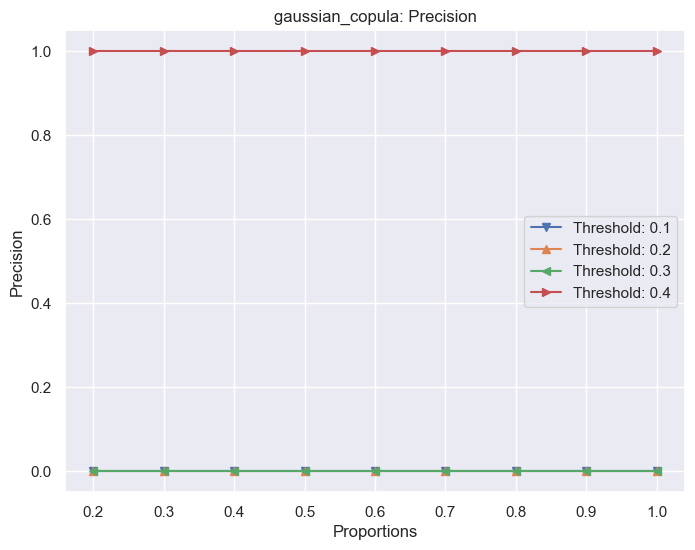

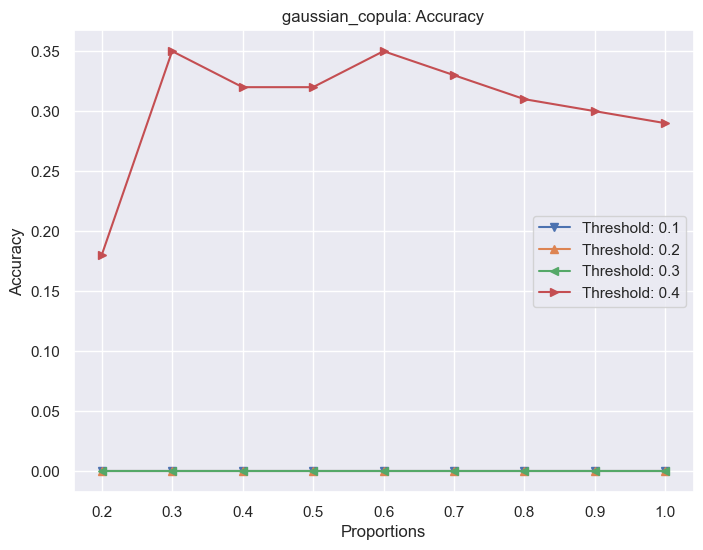

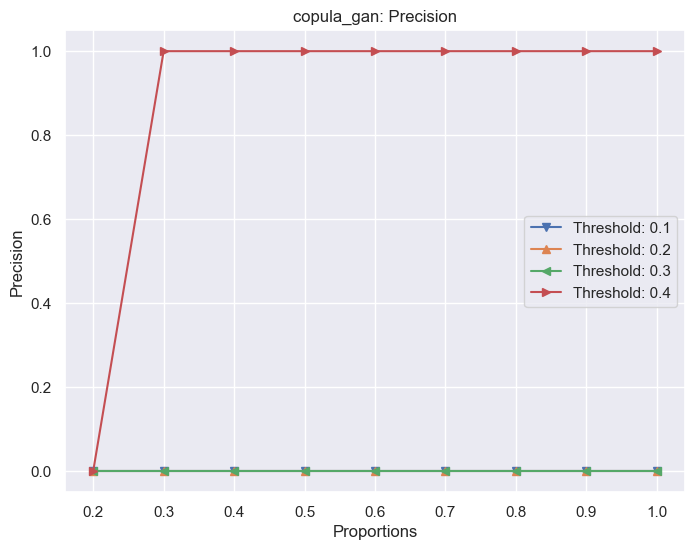

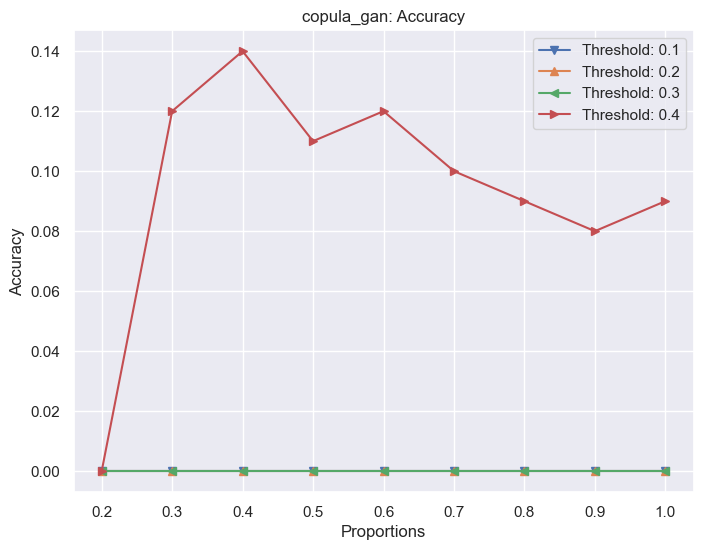

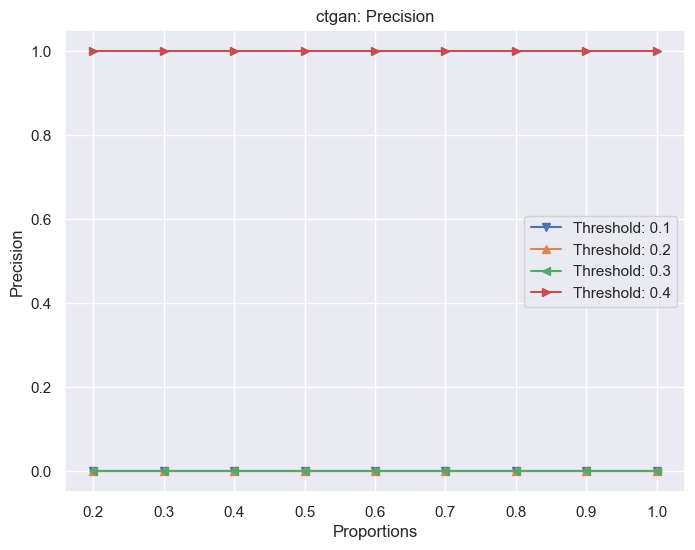

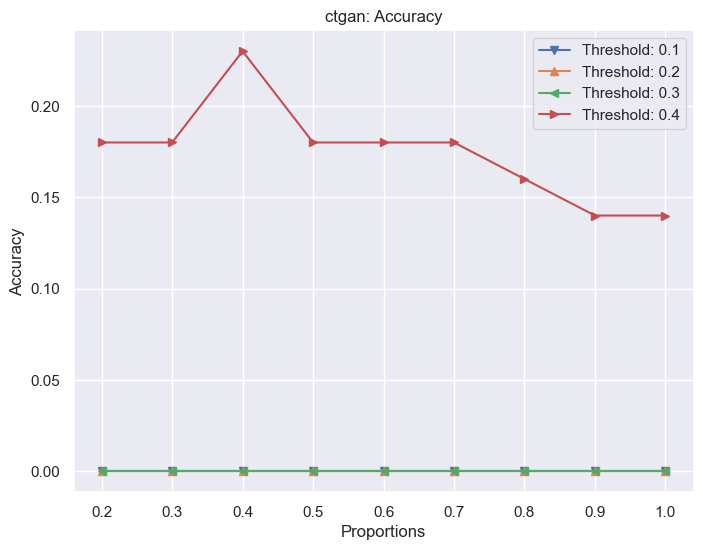

In [22]:
mia_results = {}
for i, model in enumerate(models):
    mia_results[model_names[i]] = mia(train_data, model, model_names[i], dataset_nr=3, save_plts=True)
